# Speaker Crossover Design Example for MAE 143B

In this notebook, we use the example of crossover design for speakers to review RLC circuits, deriving governing equations, writing the equations in state-space form, and then deriving the transfer function.

The transfer function is used to show the frequency response of the high-pass and low-pass filters that make up a crossover circuit. The transfer function forms the basis for designing the crossover circuit, which entails choosing capacitor and inductor values to get the desired crossover behavior, i.e. crossover frequency and filter shape.

# RLC Circuit Theory

We are going to derive the transfer function (frequency response) of an RLC circuit from scratch. A crossover is simply two RLC circuits; the (R)esistors are the speaker drivers; the inductor (L) and (C)apacitor are the components we choose. The objective is to design a high-pass filter that goes in front of the tweeter, and a low-pass filter that goes in front of the woofer so that the drivers get a clean signal in their frequency range to minimize distortion.

The circuits look like this

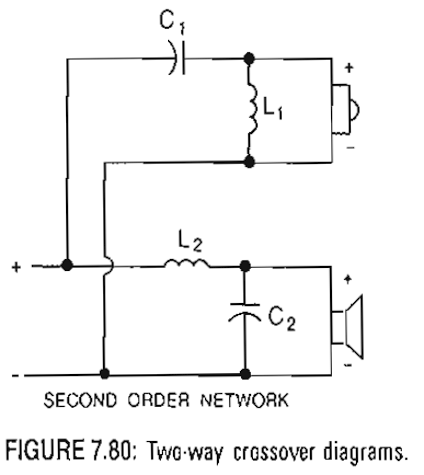



These are two simple RLC circuits representing a low-pass filter and a high-pass filter:

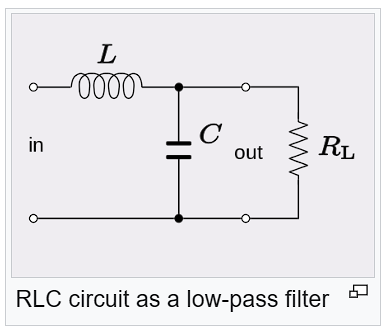

## RLC Circuit Low-Pass Filter
We are going to derive the differential equations that describe the RLC circuit. These will then give us the transfer function, or frequency response, of the filter that is the RLC circuit.

To refresh some basic electrical engineering principles:

*   The voltage drop accross an inductor, resistor, and capacitor are



\begin{align}
V_l(t) &= L \frac{d i_1(t)}{dt}, & (1) \\
V_r(t) &= i_2(t) R, & (2) \\
V_c(t) &= \frac{1}{C} \int_0^t i_3(t) dt + V_c(0), & (3a) \\
\text{take derivative of (3a) }&\to i_3(t) =  C\frac{d V_c(t)}{dt}. & (3b)
\end{align}

*   Kirchoff's Voltage Law (KVL) states that the sum of the voltages around a closed loop in a circuit is zero.

*   Kirchoff's Current Law (KCL) states that the sum of the currents entering a junction is equal to the sum of the currents leaving the junction.

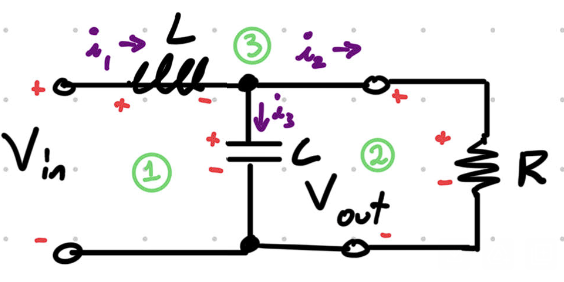

### Deriving the governing differential equations using Kirchoff's Laws
Let's start by applying KVL to Loop 1, which gives
\begin{align}
V_{\text{in}}(t) &= V_l(t) + V_c(t). & (4)
\end{align}
KVL applied to Loop 2 gives
\begin{align}
 V_c(t) &= V_r(t). & (5)
\end{align}
Combining (4) and (5), and making the substitutions given in (1) and (2), we arrive at the first important equation:
\begin{align}
V_{\text{in}}(t) &= L \frac{d i_1(t)}{dt} + i_2(t) R. & (*)
\end{align}

Now, let's apply KCL to Junction 3:
\begin{align}
i_1(t) &= i_2(t) + i_3(t). & (6)
\end{align}
Making the substitution (3b) brings us to
\begin{align}
i_1(t) &= i_2(t) + C\frac{d V_c(t)}{dt}. & (7)
\end{align}
Recall from (5) that $V_c(t) = V_r(t)$, and the derivative of $V_r(t)$ can be found by differentiating (2), which tells us
\begin{align}
\frac{d V_c(t)}{dt} = \frac{d V_r(t)}{dt} &= R \frac{d i_2(t)}{dt}. & (8)
\end{align}
Inserting the substitution from (8) back into (7) gives us the second important equation:
\begin{align}
i_1(t) &= i_2(t) + C R \frac{d i_2(t)}{dt}. & (**)
\end{align}

We can rearrange (*) and (**) to isolate the derivative terms to the left-hand-sides of the equations:
\begin{align}
\frac{d i_1(t)}{dt} &= -\frac{R}{L} i_2(t) + \frac{1}{L} V_{\text{in}}(t),\\
\frac{d i_2(t)}{dt} &= \frac{1}{CR}\left(i_1(t) - i_2(t)\right).
\end{align}

These are the governing equations for our system.
To make the notation a little easier to read, define the ''state variable''
\begin{align}
\mathbf{x}(t) &= \begin{pmatrix} x_1(t) \\ x_2(t) \end{pmatrix}
= \begin{pmatrix} i_1(t) \\ i_2(t) \end{pmatrix}, &
\dot{\mathbf{x}}(t) &= \frac{d \mathbf{x}(t)}{dt} =\begin{pmatrix} \frac{d i_1(t)}{dt} \\ \frac{d i_2(t)}{dt} \end{pmatrix}.
\end{align}
(''x dot'' is short-hand for the derivative of x.)
Let's also define the "input" $\mathbf{u}(t)$ and "output" $\mathbf{y}(t)$ as
\begin{align}
\mathbf{u}(t) &= V_{\text{in}}(t) & \mathbf{y}(t) &= V_{\text{out}}(t) &
\end{align}
Notice that the output voltage is just the voltage across the resistor, so we can write the output equation as $\mathbf{y}(t) = R i_2(t)$.

With all of this in mind, we can rewrite the equations in matrix form as
\begin{align}
\dot{\mathbf{x}}(t) &= \mathbf{A}\mathbf{x}(t) + \mathbf{B}\mathbf{u}(t) & (9)\\
\mathbf{y}(t) &= \mathbf{C} \mathbf{x}(t)
\end{align}
where the matrices $\mathbf{A}$,$\mathbf{B}$, and $\mathbf{C}$ are given by
\begin{align}
\mathbf{A}& = \begin{bmatrix} 0& -\frac{R}{L} \\ \frac{1}{CR}& -\frac{1}{CR} \end{bmatrix}, &
\mathbf{B}& = \begin{bmatrix}\frac{1}{L} \\ 0 \end{bmatrix}, &
\mathbf{C}& = \begin{bmatrix}0 & R \end{bmatrix}. & (10)
\end{align}

We like this form because it is the standard form for all "linear time-invariant systems".
This is called the state-space representation of an LTI system.
https://en.wikipedia.org/wiki/State-space_representation

So our system is a single-input/single-output (SISO) LTI system.



One of the nice things about this form is that we know the transfer function of SISO LTI systems; it is
\begin{align}
H(s) &= \mathbf{C} (s\mathbf{I}-\mathbf{A})^{-1} \mathbf{B}. & (11)
\end{align}
You can "derive" this very easily using the Laplace transform; all you need to know is $\mathcal{L}(f(t)) = F(s)$ and $\mathcal{L}(\dot{x}(t)) = s X(s)$.
So taking the Laplace transform of (9), we get
\begin{align}
s\mathbf{X}(s) &= \mathbf{A}\mathbf{X}(s) + \mathbf{B}\mathbf{U}(s)\\
\mathbf{Y}(s) &= \mathbf{C} \mathbf{X}(s)
\end{align}
Rearranging, we get
\begin{align}
(s\mathbf{I}-\mathbf{A})\mathbf{X}(s) &= \mathbf{B}\mathbf{U}(s)\\
\mathbf{X}(s) &= (s\mathbf{I}-\mathbf{A})^{-1}\mathbf{B}\mathbf{U}(s)\\
\mathbf{Y}(s) &= \mathbf{C}(s\mathbf{I}-\mathbf{A})^{-1}\mathbf{B}\mathbf{U}(s)
\end{align}
The transfer function is defined as the mapping from the input to the output, or $H(s) =\frac{\mathbf{Y}(s)}{\mathbf{U}(s)} $, which gets us to (11).

Plugging in the matrices $\mathbf{A}$,$\mathbf{B}$, and $\mathbf{C}$ and cranking out some matrix algebra will give us the transfer function.
For completeness here is all that algebra:
\begin{align}
H(s) &= \mathbf{C} (s\mathbf{I}-\mathbf{A})^{-1} \mathbf{B} \\
&= \begin{bmatrix}0 & R \end{bmatrix} \begin{bmatrix} s& \frac{R}{L} \\ -\frac{1}{CR}& s+\frac{1}{CR} \end{bmatrix}^{-1} \begin{bmatrix}\frac{1}{L} \\ 0 \end{bmatrix}
\end{align}
The formula for the inverse of a 2 by 2 matrix is
\begin{align}
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
 \qquad \to \qquad
  A^{-1} = \frac{1}{ad - bc} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
\end{align}
Using this formula, the transfer function is
\begin{align}
H(s) &= \frac{1}{s^2 + \frac{1}{CR} s + \frac{1}{LC}} \begin{bmatrix}0 & R \end{bmatrix}
\begin{bmatrix}
s+\frac{1}{CR}  & -\frac{R}{L} \\
\frac{1}{CR} & s
\end{bmatrix} \begin{bmatrix}\frac{1}{L} \\ 0 \end{bmatrix} \\
&= \frac{1}{s^2 + \frac{1}{CR} s + \frac{1}{LC}}  \begin{bmatrix}0 & R \end{bmatrix} \begin{bmatrix}
\frac{s}{L}+\frac{1}{LCR}   \\
\frac{1}{LCR}
\end{bmatrix}\\
&= \frac{1}{s^2 + \frac{1}{CR} s + \frac{1}{LC}} \frac{1}{LC}
\end{align}

So the transfer function for the RLC circuit, i.e. the frequency response for the crossover, is given by
\begin{align}
H(s) &= \frac{\frac{1}{LC}}{s^2 + \frac{1}{CR} s + \frac{1}{LC}} . & (12)
\end{align}

Technically, the frequency response is obtained by evaulating the transfer function along the imaginary axis, i.e. along $s = i \omega$ where $i = \sqrt{-1}$ and the frequency $\omega$ goes from 0 to $\infty$.
$H(i \omega)$ is a complex number for every frequency; taking the absolute value gives the magnitude, and taking the angle gives the phase.

In the next section of code I'll plot precisely this for some values of $R$, $L$, and $C$ to show the magnitude and phase plots.


### Frequency Response Plots for the Low-Pass Filter

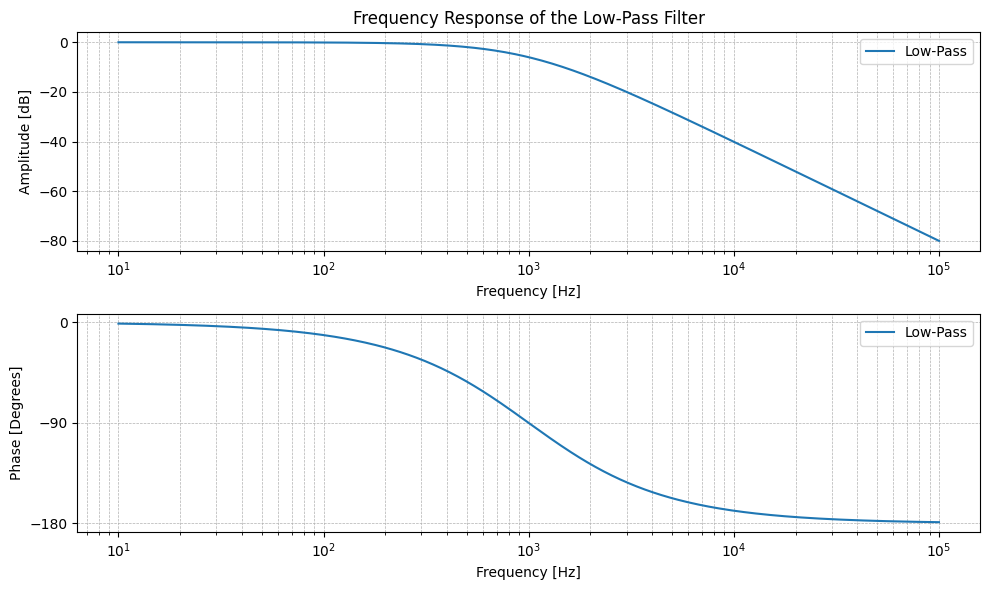

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs


R = 8
L = 2.5464 * 10**-3
C = 9.95 * 10**-6


# Frequency range for plotting
f = np.logspace(1, 5, 400)
omega = 2 * np.pi * f

# Transfer functions
s = 1j * omega

H_LP = 1/(L*C) / (s**2 + 1/(R*C)*s + 1/(L*C))

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(f, 20 * np.log10(np.abs(H_LP)), label='Low-Pass')
plt.title('Frequency Response of the Low-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(f, np.angle(H_LP, deg=True), label='Low-Pass')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [Degrees]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(np.arange(-180, 1, 90))
plt.legend()

plt.tight_layout()
plt.show()

These are called the Bode Plots for the system, and they show the frequency response in magnitude and phase.
The system is low-pass because when you feed low frequencies into the system, you get low frequencies out with almost no phase shift.
However, if you feed high-frequencies into the system, they are attenuated strongly and little output is produced.
The magnitude plot shows this as the roll-off at high frequencies.


Notice how there is a special frequency where the phase is exactly -90 degrees, and this corresponds to the frequency where the magnitude starts to fall off.
**This is the key feature we need to exploit to design a crossover.**
We know $R$, and we are going to choose the crossover frequency $f_c = \frac{\omega_c}{2\pi}$. Based on that, we want to choose $L$ and $C$ to get this type of frequency response.

But how can we get two values, $L$ *and* $C$, from just choosing one cutoff frequency? Well, let's see what happens to the frequency response above if we change $L$ or $C$.

First, I'll just make $C$ 1000 times larger.

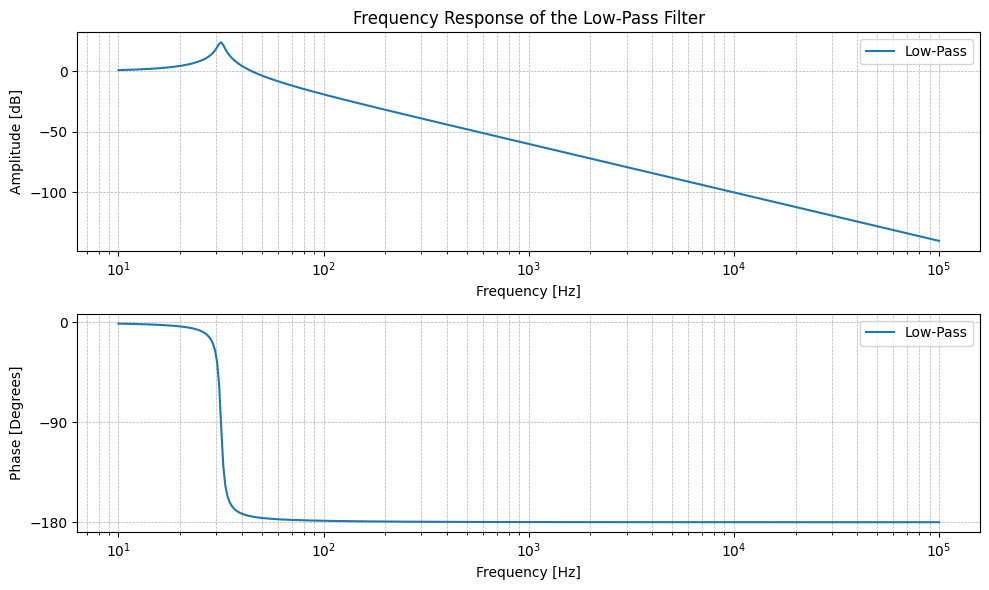

In [ ]:
C = 1000* 9.95 * 10**-6

H_LP = 1/(L*C) / (s**2 + 1/(R*C)*s + 1/(L*C))

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(f, 20 * np.log10(np.abs(H_LP)), label='Low-Pass')
plt.title('Frequency Response of the Low-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(f, np.angle(H_LP, deg=True), label='Low-Pass')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [Degrees]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(np.arange(-180, 1, 90))
plt.legend()

plt.tight_layout()
plt.show()

Instead of having 0 dB magnification, there is a peak!
This is called resonance; if we feed the circuit that frequency, we get a magnification of that frequency on the output.
However, notice that the resonant frequency has shifted down.
If we divide $L$ by 1000 to counterbalance the 1000 factor that we used to increase $C$, we can bring the resonant (natural) frequency of the system back up to 1000 Hz.

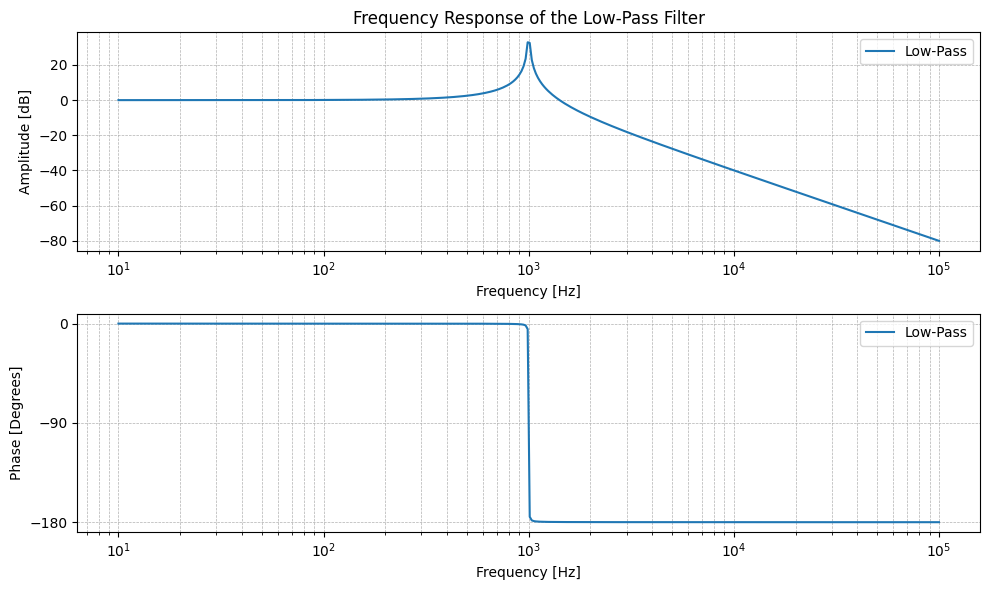

In [ ]:
L = 2.5464 * 10**-6
C = 9.95 * 10**-3

H_LP = 1/(L*C) / (s**2 + 1/(R*C)*s + 1/(L*C))

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(f, 20 * np.log10(np.abs(H_LP)), label='Low-Pass')
plt.title('Frequency Response of the Low-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(f, np.angle(H_LP, deg=True), label='Low-Pass')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [Degrees]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(np.arange(-180, 1, 90))
plt.legend()

plt.tight_layout()
plt.show()

Notice how the natural frequency of the system always has a 90 degree phase shift.
Think of this like pushing a kid on swing; if you push when they are coming back at you, you waste a lot of energy and slow the swing down, whereas if you push at "the right time" you inject energy into the system and the magnitude of the oscillation grows.
Resonance occurs when the forcing happens at the right frequency, but also when the force driving the system is in the correct phase with respect to the oscillation of the system.
90 degrees turns out to be the optimal phase shift to inject the most energy into the system.

For an audio signal filter for a low-pass or high-pass filter, we definitely don't want any strange amplification of certain frequencies, so we don't want to have these peaks due to resonance.
So what if we flip things and instead of increasing $C$ and decreasing $L$, what if we increase $L$ and decrease $C$?

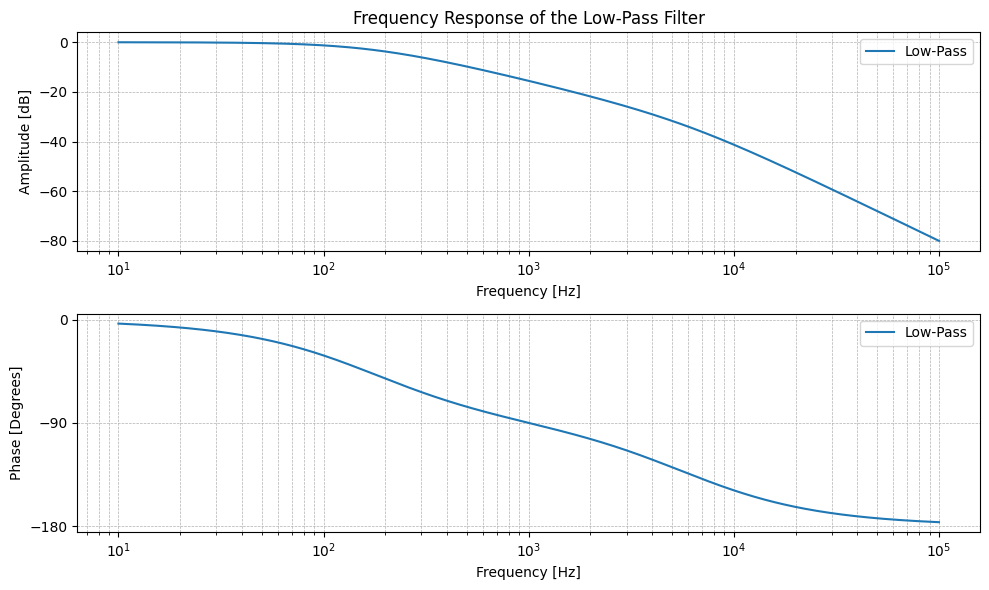

In [ ]:
L = 3* 2.5464 * 10**-3
C = 1/3* 9.95 * 10**-6

H_LP = 1/(L*C) / (s**2 + 1/(R*C)*s + 1/(L*C))

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(f, 20 * np.log10(np.abs(H_LP)), label='Low-Pass')
plt.title('Frequency Response of the Low-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(f, np.angle(H_LP, deg=True), label='Low-Pass')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [Degrees]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(np.arange(-180, 1, 90))
plt.legend()

plt.tight_layout()
plt.show()

Here I only shifted things by a factor of 3 this time, but already there is a huge difference in the frequency response! The filter gets sort of muddy, and instead of having a clean separation between the low-pass and the high attenuation, more of the low frequencies are getting attenuated as well!
And the phase is all messed up.
Apparently it is very important to get the $L$ and $C$ values right!

## RLC Circuit High-Pass Filter
We are going to derive the differential equations that describe the RLC circuit. These will then give us the transfer function, or frequency response, of the filter that is the RLC circuit.

To refresh some basic electrical engineering principles:

*   The voltage drop accross an inductor, resistor, and capacitor are



\begin{align}
V_l(t) &= L \frac{d i_1(t)}{dt}, & (1) \\
V_r(t) &= i_2(t) R, & (2) \\
V_c(t) &= \frac{1}{C} \int_0^t i_3(t) dt + V_c(0), & (3a) \\
\text{take derivative of (3a) }&\to i_3(t) =  C\frac{d V_c(t)}{dt}. & (3b)
\end{align}

*   Kirchoff's Voltage Law (KVL) states that the sum of the voltages around a closed loop in a circuit is zero.

*   Kirchoff's Current Law (KCL) states that the sum of the currents entering a junction is equal to the sum of the currents leaving the junction.

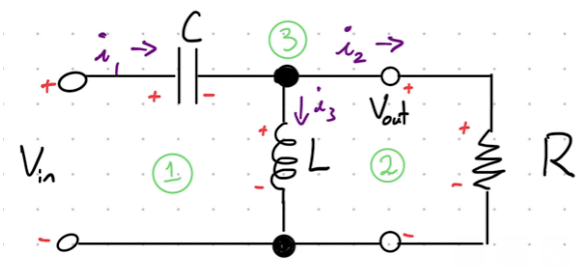

# Applying the theory to second-order Linkwitz-Riley crossover design

Now that we derived all of the theory and understand where the formulas come from, it is straight-forward to use the formulas to design a crossover circuit.
The next block of code is a simple script that can be used to calculate, for a desired crossover frequency, the optimal inductor and capacitor values to use in the crossover.

Crossover frequency 2500; desired component values
  C1: 5.306666666666667 μF.
  C2: 3.98 μF.
  L1: 0.76392 mH.
  L2: 1.0185600000000001 mH.


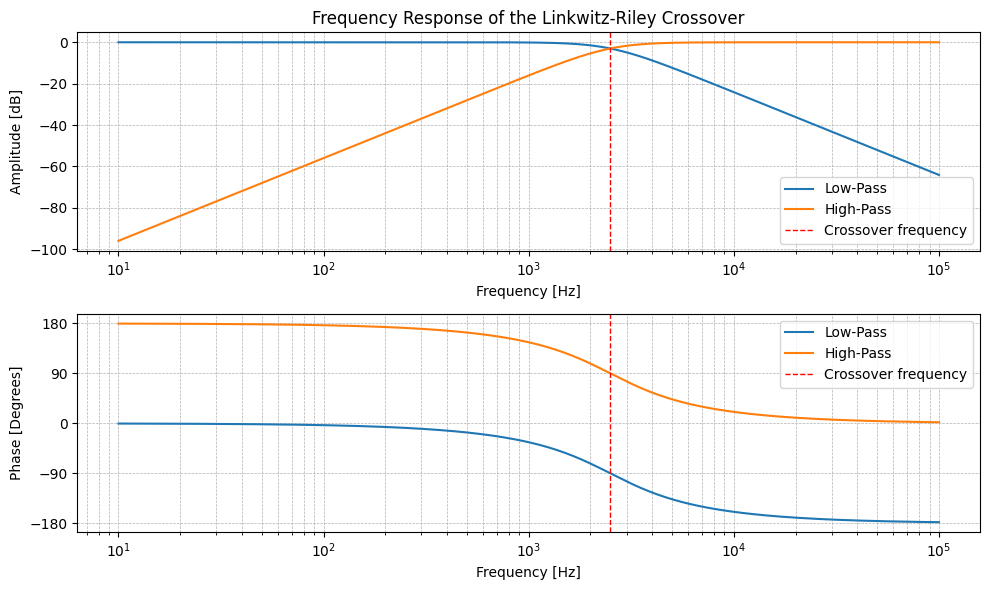

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

################# These are the function definitions ###########################
def calculate_components(f, R_L, R_H):
    # Crossover frequency in rad/s

    # Component calculations for the second-order Linkwitz-Riley crossover
    # These formulas can be derived from the transfer function but are beyond
    # the scope of this notebook. They have to do with ensuring the crossover
    # frequency occurs at the desired frequency f and ensuring that we don't have
    # any unwanted  attenuation or amplification (i.e. ensuring the optimal filter shape).
    C1 = 0.0796/(R_H*f)
    C2 = 0.0796/(R_L*f)
    L1 = 0.3183*R_H/f
    L2 = 0.3183*R_L/f

    return C1, L1, C2, L2

def plot_frequency_response(f_cutoff):

    # Frequency range for plotting
    f = np.logspace(1, 5, 400)
    omega = 2 * np.pi * f

    # Transfer functions
    omega_c = 2 * np.pi * f_cutoff
    s = 1j * omega

    H_LP = omega_c**2 / (s**2 + np.sqrt(2) * omega_c * s + omega_c**2)
    H_HP = s**2 / (s**2 + np.sqrt(2) * omega_c * s + omega_c**2)

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.semilogx(f, 20 * np.log10(np.abs(H_LP)), label='Low-Pass')
    plt.semilogx(f, 20 * np.log10(np.abs(H_HP)), label='High-Pass')
    plt.title('Frequency Response of the Linkwitz-Riley Crossover')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.axvline(x=f_cutoff, color='r', linestyle='--', linewidth=1, label='Crossover frequency')
    plt.legend()


    plt.subplot(2, 1, 2)
    plt.semilogx(f, np.angle(H_LP, deg=True), label='Low-Pass')
    plt.semilogx(f, np.angle(H_HP, deg=True), label='High-Pass')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [Degrees]')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.yticks(np.arange(-180, 181, 90))
    plt.axvline(x=f_cutoff, color='r', linestyle='--', linewidth=1, label='Crossover frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


############# Change these values to change the cross-over design ##############

# Example usage:
f = 2500  # Crossover frequency in Hz
R_H = 6  # High-pass impedance in ohms
R_L = 8   # Low-pass impedance in ohms


C1, L1, C2, L2 = calculate_components(f, R_L, R_H)

print(f"Crossover frequency {f}; desired component values")
print(f"  C1: {C1*10**6} μF.")
print(f"  C2: {C2*10**6} μF.")
print(f"  L1: {L1*10**3} mH.")
print(f"  L2: {L2*10**3} mH.")

plot_frequency_response(f)

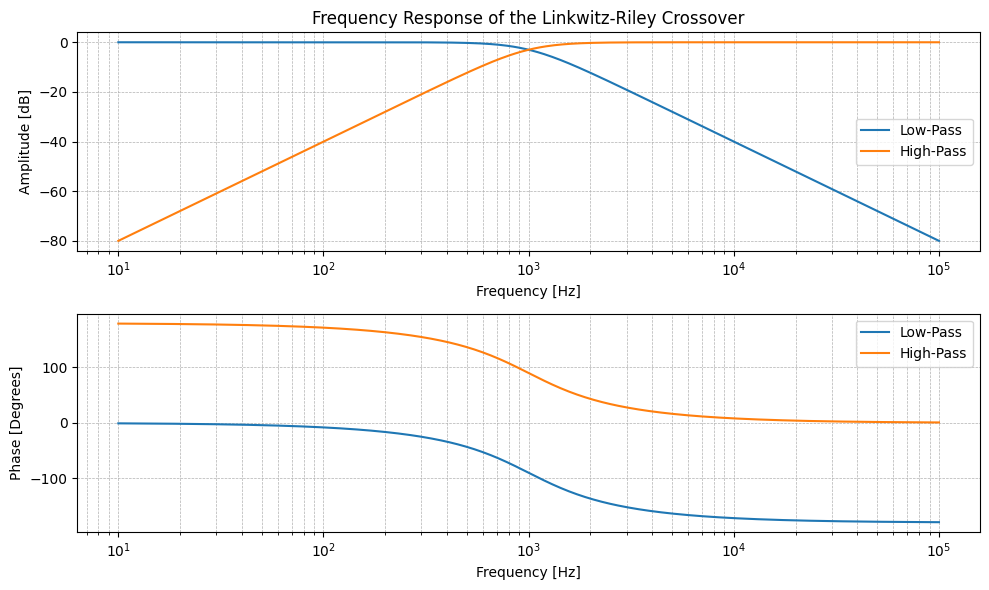

In [ ]:
f_c = 1000

# Frequency range for plotting
f = np.logspace(1, 5, 400)
omega = 2 * np.pi * f

# Transfer functions
omega_c = 2 * np.pi * f_c
s = 1j * omega

H_LP = omega_c**2 / (s**2 + np.sqrt(2) * omega_c * s + omega_c**2)
H_HP = s**2 / (s**2 + np.sqrt(2) * omega_c * s + omega_c**2)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(f, 20 * np.log10(np.abs(H_LP)), label='Low-Pass')
plt.semilogx(f, 20 * np.log10(np.abs(H_HP)), label='High-Pass')
plt.title('Frequency Response of the Linkwitz-Riley Crossover')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(f, np.angle(H_LP, deg=True), label='Low-Pass')
plt.semilogx(f, np.angle(H_HP, deg=True), label='High-Pass')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [Degrees]')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

# Additional background for the curious

Let's say you don't like the filter performance; then you can design a higher order filter. The Linkwitz-Riley filter is one of the simpler filters and is a second-order filter, but more complex designs exist.

Example of a tweeter data sheet: https://store.miscospeakers.com/1-inch-tweeter-93019

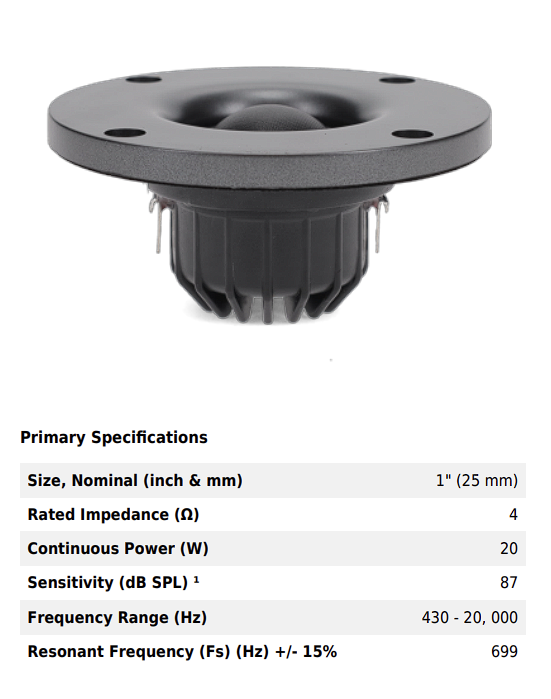

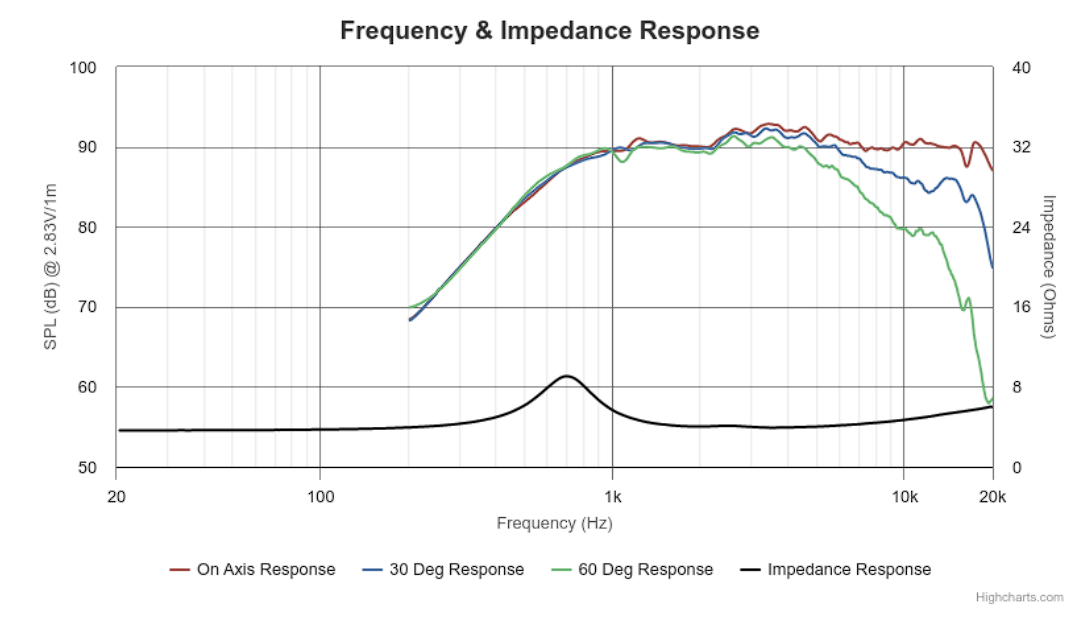

Let's say we choose this woofer: https://store.miscospeakers.com/4-inch-woofer-93026  , which lists a frequency range of 60--9500 Hz. The tweeter performs well from 430--20000 Hz, so we would choose the cutoff frequency as let's say 2500 Hz. Then both the tweeter and the woofer are receiving signals in their operating range, so they will produce cleaner audio outputs and the music will sound better :).

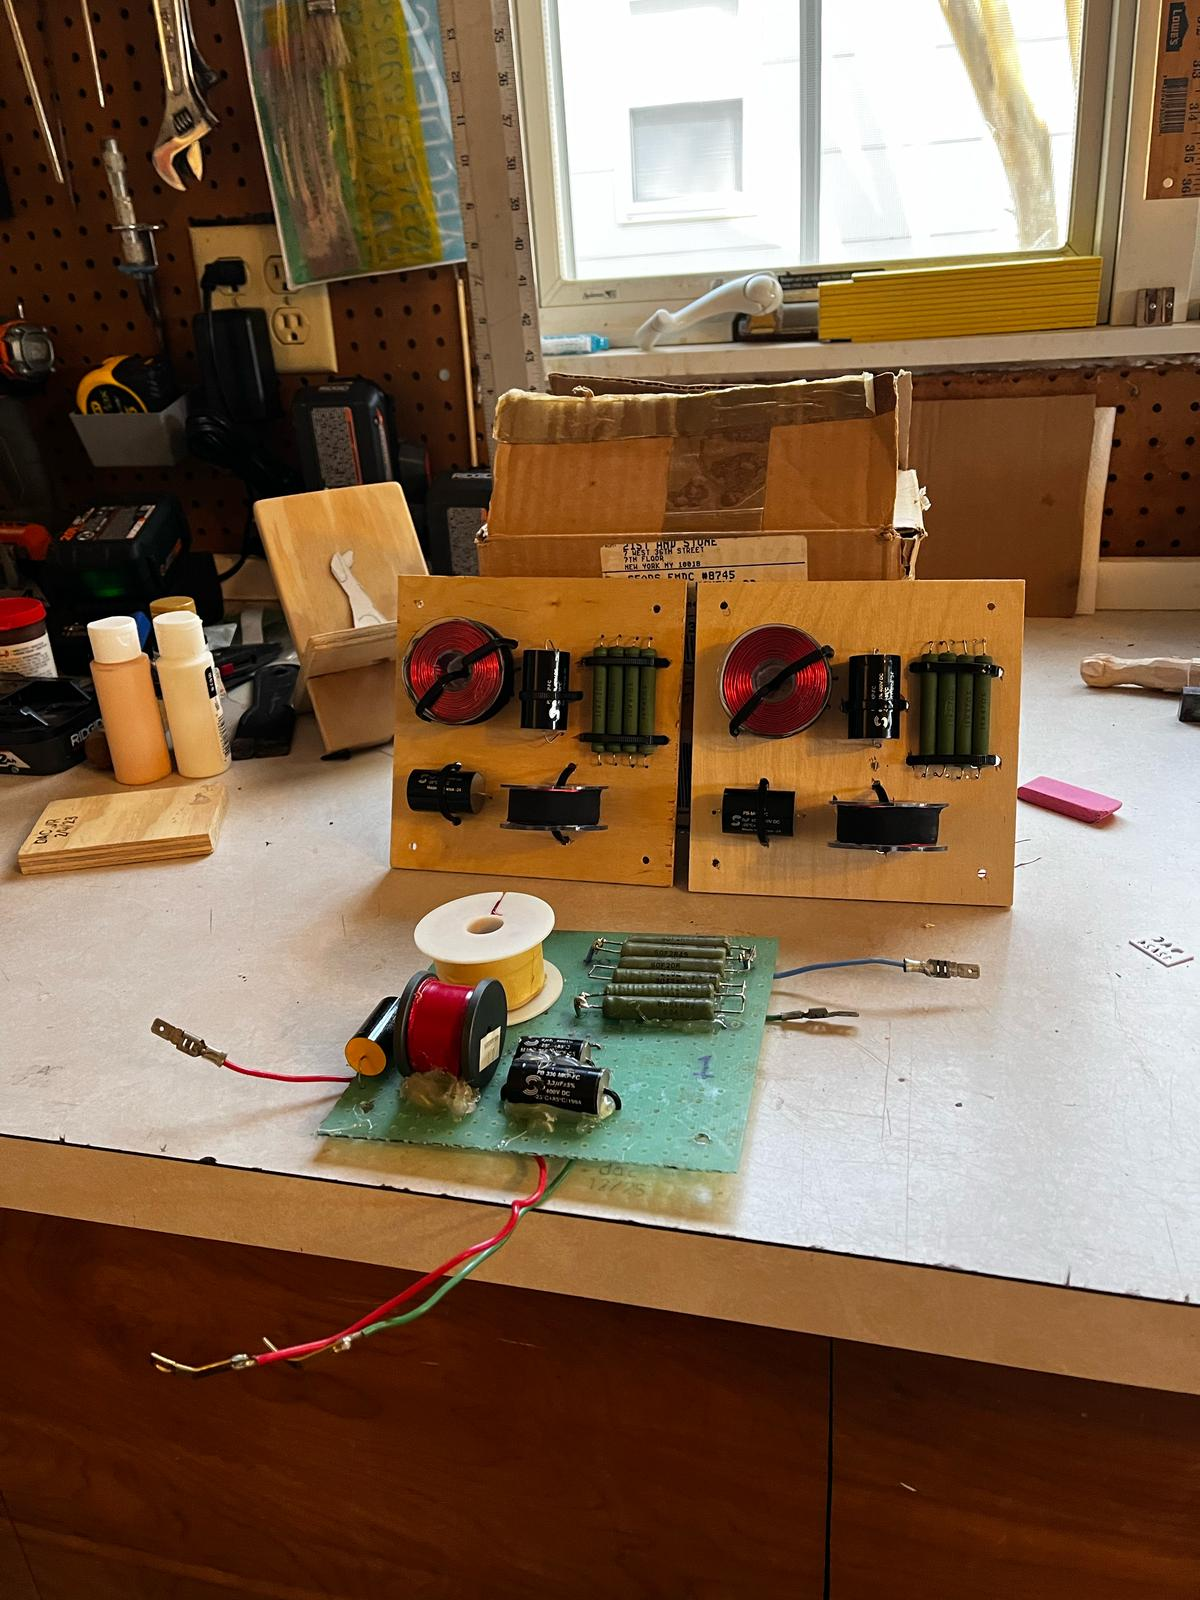